# Exercise 12.1

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task. 

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

Keras can conveniently download the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples
an example of a data point with label 4


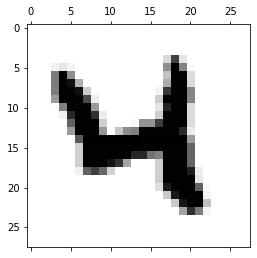

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [2]:
# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

We can now move on to construct our deep neural net. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one using the `add()` method

For the purposes of our example, it suffices to focus on `Dense` layers for simplicity. Every `Dense()` layer accepts as its first required argument an integer which specifies the number of neurons. The type of activation function for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`. 

In order for our DNN to work properly, we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.  

In this step I also choose the optimizer.

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    return model

print('Model architecture created successfully!')

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model_sgd():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['accuracy'])
    return model

def compile_model_adamax():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['accuracy'])
    return model

def compile_model_adagrad():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adagrad(),
                  metrics=['accuracy'])
    return model

def compile_model_adam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['accuracy'])
    return model

def compile_model_nadam():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Nadam(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model architecture created successfully!
Model compiled successfully and ready to be trained.


Now I train the model.

In [4]:
# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model_sgd()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7280 - accuracy: 0.7886 - val_loss: 0.3028 - val_accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3727 - accuracy: 0.8941 - va

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

313/313 [==============================] - 0s 532us/step - loss: 0.1571 - accuracy: 0.9502

Test loss: 0.15709815919399261
Test accuracy: 0.9502000212669373


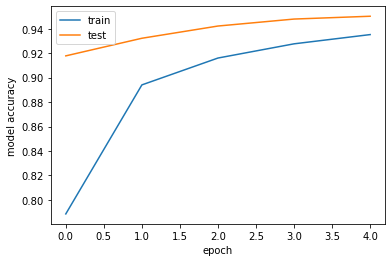

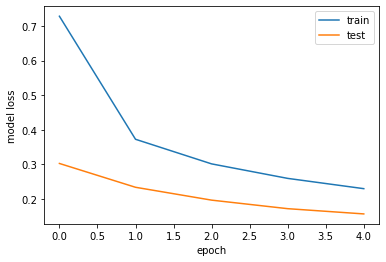

In [5]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

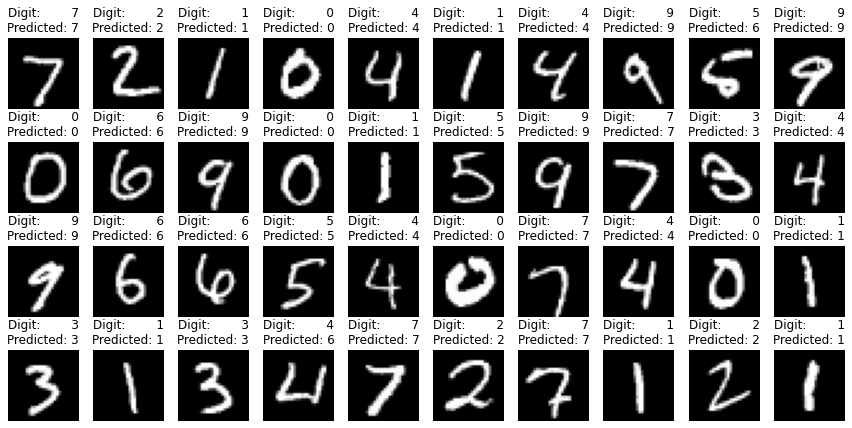

In [6]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(40):    
    ax = plt.subplot(8, 10, i + 1)    
    plt.imshow(X_test2[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

These are the result with `sgd` as optimizer.
By keeping fixed all the other parameters, I'll try to use at least two other optimizers, different from SGD:
 1. `adamax`
 2. `adagrad`
 3. `adam`
 4. `nadam`

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4120 - accuracy: 0.8802 - val_loss: 0.1680 - val_accuracy: 0.9513
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1973 - accuracy: 0.9455 - 

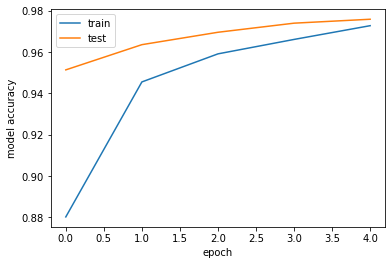

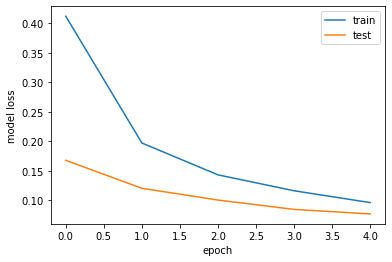

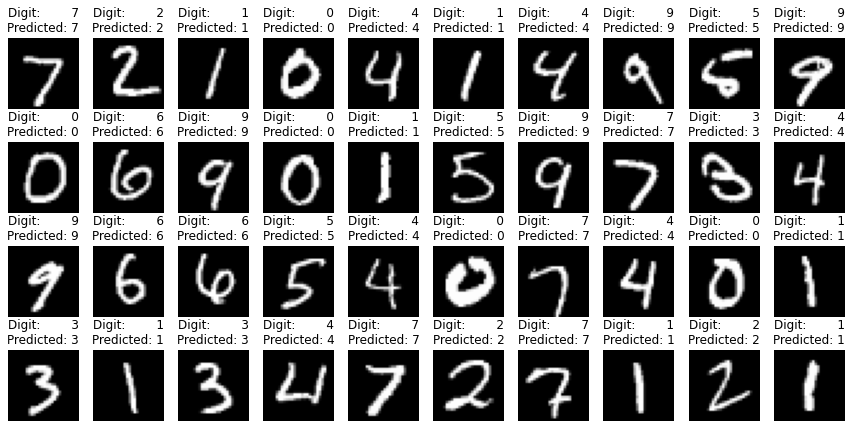

In [7]:
# (1)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model_adamax()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
predictions = model_DNN.predict(X_test)

X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(40):    
    ax = plt.subplot(8, 10, i + 1)    
    plt.imshow(X_test2[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2764 - accuracy: 0.6297 - val_loss: 0.6232 - val_accuracy: 0.8646
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6975 - accuracy: 0.8004 - 

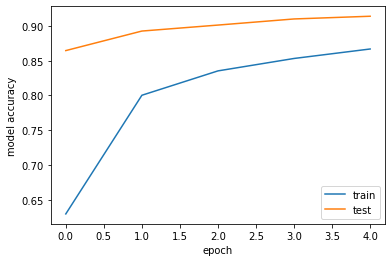

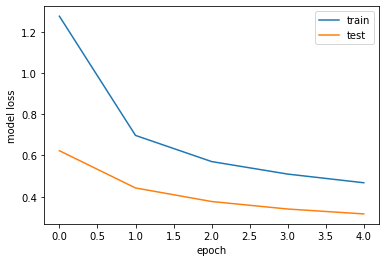

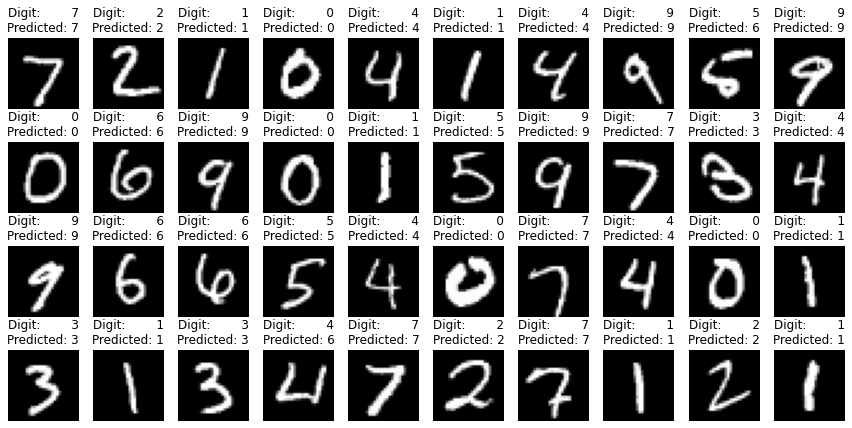

In [8]:
#(2)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model_adagrad()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
predictions = model_DNN.predict(X_test)

X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(40):    
    ax = plt.subplot(8, 10, i + 1)    
    plt.imshow(X_test2[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               40100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2754 - accuracy: 0.9190 - val_loss: 0.1252 - val_accuracy: 0.9606
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1204 - accuracy: 0.9657 - 

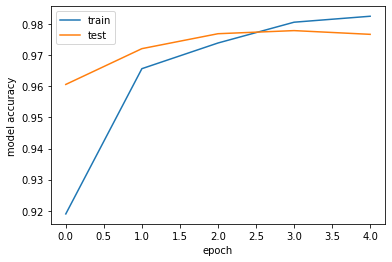

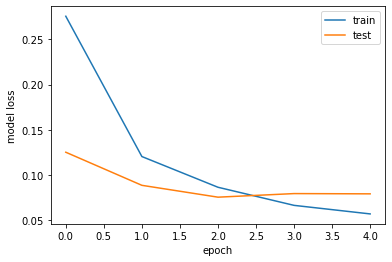

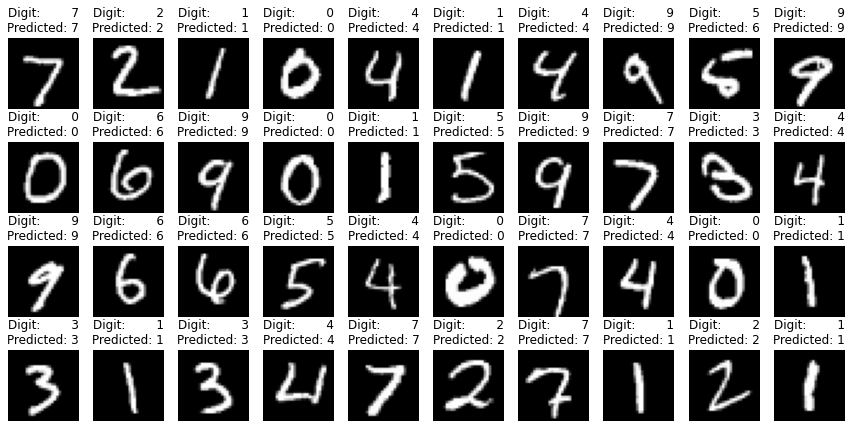

In [9]:
# (3)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model_adam()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
predictions = model_DNN.predict(X_test)

X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(40):    
    ax = plt.subplot(8, 10, i + 1)    
    plt.imshow(X_test2[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               40100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 355,110
Trainable params: 355,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2771 - accuracy: 0.9189 - val_loss: 0.1064 - val_accuracy: 0.9670
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1207 - accuracy: 0.9652 

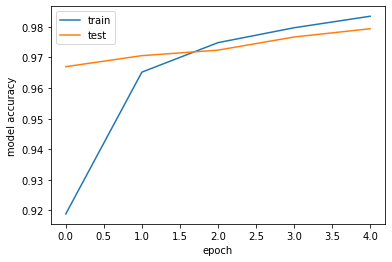

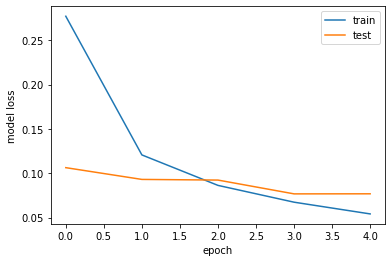

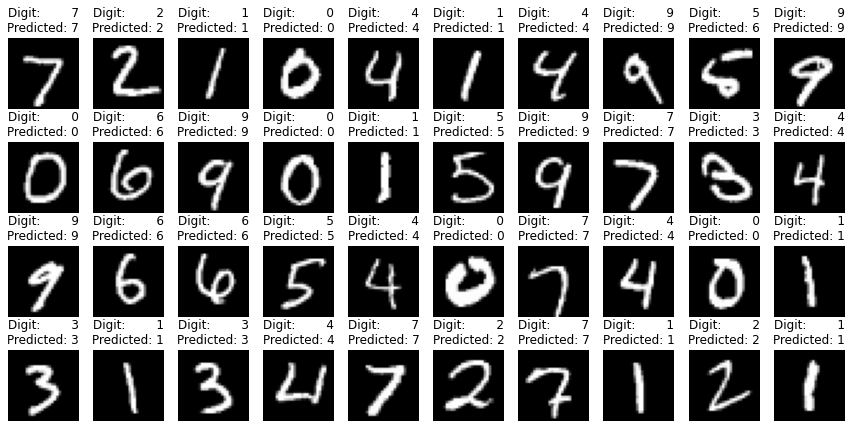

In [10]:
# (4)

# training parameters
batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model_nadam()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test2 = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(40):    
    ax = plt.subplot(8, 10, i + 1)    
    plt.imshow(X_test2[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

Within the chosen optimizers, <a href=https://xkcd.com/2048/>`adamax`</a> gives the best result, with loss values much lower compared to the other optimizers.  
Even in terms of accuracy, `adamax` seems to find a better minimum to the loss function.

The results obtained with `adam` are interesting: loss and accuracy are similar to the ones obtained with `adamax` with the training dataset. With the test dataset the results are worse though.

# Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that you should complete:

In [11]:
# you will need the following for Convolutional Neural Networks
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten, Conv2D, MaxPooling2D

from keras.layers import AveragePooling2D


# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

#Y_train = Y_train.reshape(Y_train.shape[0], 1, 1, 1)
#Y_test = Y_test.reshape(Y_test.shape[0], 1, 1, 1)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 784)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Y_train shape: (60000, 10)


In [12]:
def create_CNN():
    
    # instantiate model
    model = Sequential()
    
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(2, 2), activation='relu', input_shape=input_shape))
    model.add(Conv2D(10, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(10, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
        
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    # Final layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
    
    return model

def create_CNN_fast():
    
    # instantiate model
    model = Sequential()
    
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
    
    model.add(Flatten())
    # Final layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
    
    return model

def create_CNN_good():
    
    # instantiate model
    model = Sequential()
    
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(7, 7), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid", data_format=None))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    # Final layer
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer='Adam', metrics=['accuracy'])
    
    return model

In [13]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
history=model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 10)        50        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 10)        410       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 10)        410       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 10)          2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 160)              


Test loss: 0.034208159893751144
Test accuracy: 0.9901000261306763


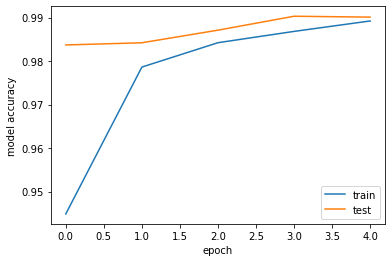

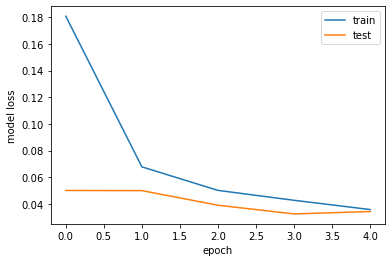

In [14]:

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

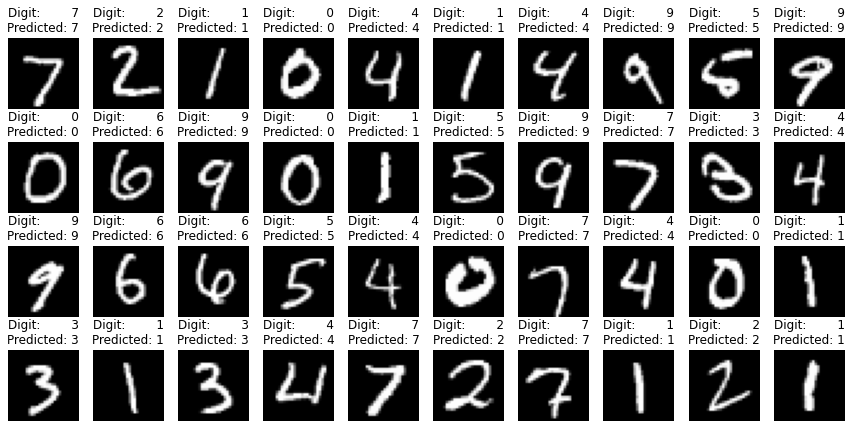

4926 esatti su 5000
98.52 %


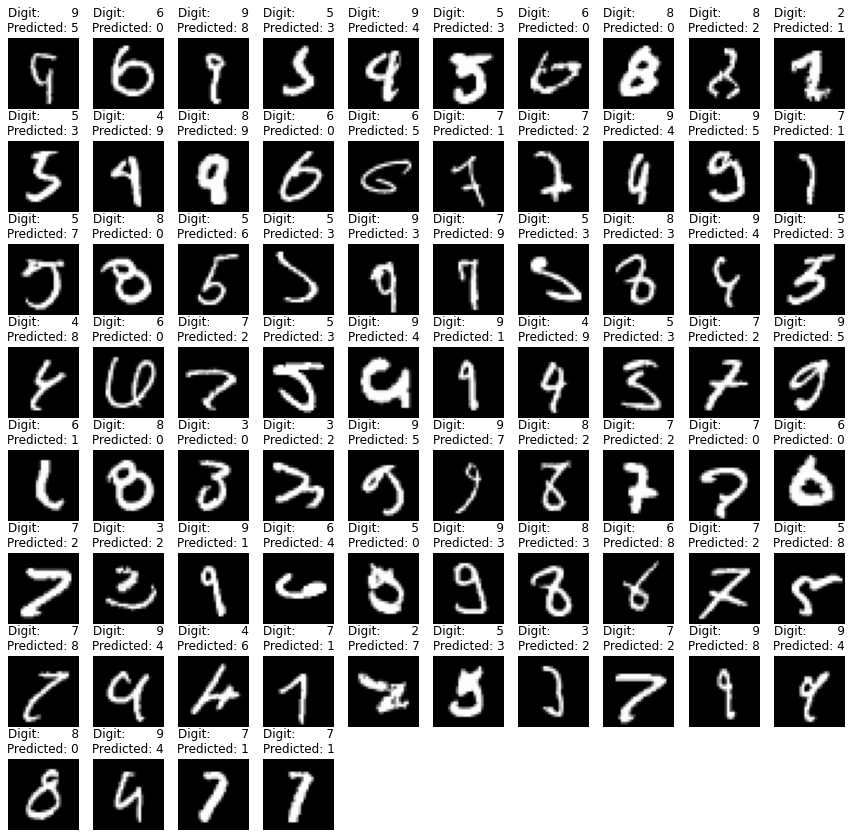

In [15]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)
sum = 0
plt.figure(figsize=(15, 15)) 
for i in range(40):    
    ax = plt.subplot(8, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()
total = 5000
for i in range(total):
    if np.argmax(Y_test[i]) == np.argmax(predictions[i]):
        sum += 1
print(sum, 'esatti su', total)
print(sum/float(total)*100.0, '%')
plt.figure(figsize=(15, 30)) 
counter = 0
for i in range(total):      
    if np.argmax(Y_test[i]) != np.argmax(predictions[i]):
        ax = plt.subplot(16, 10, counter + 1)  
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit:        {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off')
        counter += 1
plt.show()

How many convolutions should I add to the NN?  
 - With one convolution, I have an accuracy of about 0.985 (loss = 0.046). (Training time = $8$s$ \, \cdot N_{epochs}$)
 - With three convolutions, I have an accuracy of about 0.982 (loss = 0.058). (Training time = $22$s$ \, \cdot N_{epochs}$)  
There isn't much difference between the two. With more convolutions the accuracy increases and the training time increases (direct proportionality).  

How many pixels should I include in each convolution?
 - With one convolution and a region of 2x2 pixels, I have an accuracy of about 0.976 (loss = 0.079). (Training time = $4.5$s$ \, \cdot N_{epochs}$)
 - With one convolution and a region of 10x10 pixels, I have an accuracy of about 0.985 (loss = 0.046). (Training time = $13$s$ \, \cdot N_{epochs}$)  
 
The training time is tripled and the accuracy increases by about 1%.  
Trying intermediate values, I have the best results with 6x6 or 7x7 regions. I choose a 7x7 region, because after the Conv2D layer I end up with an even number of rows and columns.  

I also tried to add a Dropout layer (50% or 20%) after the Conv2D layer, but I saw no difference.  

After the convolution, I can use a Pooling layer, in order to reduce the number of parameters.
With AveragePooling2D I have worse result than with MaxPooling2D. This does make sense because AveragePooling2D is more sensitive to translation of objects inside the image.  
Is it better to add the Pooling layer after each convolution or after two/three convolutions?  
For the first pooling layer it's better to add it after a couple of Convolutional layers. For the other pooling layers it's better to add them after each convolution in order to reduce overfitting (and training times too).  

Then I add a Flatten layer followed by some Dense layers. How many of them should I add?
 - With three Dense layers of 200 neurons each I have an accuracy of about 0.988 (loss = 0.036).
 - With one Dense layer with 1024 neurons I have an accuracy of about 0.991 (loss - 0.034).
I choose a single Dense layer, followed by a layer that drops 50% of connections (`Dropout(0.5)`).  
After that layer I also a Dense layer with 10 neurons.

Which optimizer should I use?  
I have the best results with Adam. With Adamax the NN converges faster but it is less accurate. With SGD the NN converges very slowly. With RMSProp the results are inbetween Adam and Adamax.  
If I increase $N_{epochs}$ from 5 to 10 the NN with SGD has a high precision, but the NN with Adam improves even further.

Summary:
 - I use a few Conv2D layers followed by MaxPooling layers.
 - I add a Flatten layer.
 - I add a Dense layer with 1024 neurons with 50% of dropout.
 - Final layer with 10 neurons.
 - I use Adam as optimizer.
 
Another alternative may be (much faster training time, but less precision):
 - Single Conv2D followed by a MaxPooling layer.
 - Flatten layer
 - Final layer with 10 neurons.
 - I use Adam as optimizer.

# Exercise 12.3

I used the `gimp` application to create a few pictures of my "handwritten" digits, I imported them in the jupyter-notebook and tried to see if my CNN is able to recognize my handwritten digits.

In [16]:
from PIL import Image
import os
import subprocess

subtotal = 0
data_array = []
data_correct = []
for i in range(10):
    for j in range(3):
        pic_num = int(subprocess.check_output(["/bin/sh", "-c", "ls ./Pictures/ | grep ^"+str(i)+"_"+str(j)+".png | wc -l"]).decode('utf-8'))
        
        subtotal += pic_num
        if pic_num != 0:
            digit_filename = "./Pictures/"+str(i)+"_"+str(j)+".png"
            digit_in = Image.open(digit_filename).convert('L')

            ydim, xdim = digit_in.size
            pix=digit_in.load();
            data = np.zeros((xdim, ydim))
            for kk in range(ydim):
                for k in range(xdim):
                    data[k,kk]=pix[kk,k]

            data /= 255
            data_array.append(data)
            data_correct.append(i)
    
data_array = np.array(data_array)
data_array = data_array.reshape(data_array.shape[0], img_rows, img_cols, 1)
print(subtotal, 'images found')

30 images found


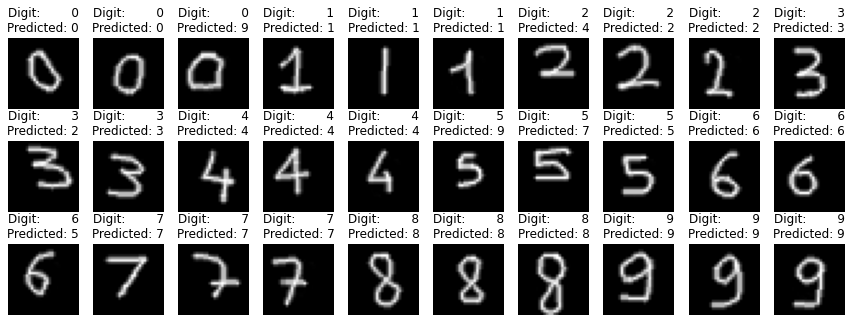

24 correct out of 30
80.0 %


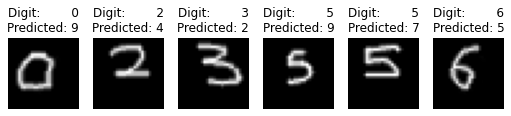

In [17]:
from PIL import Image
import os
import subprocess

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

predictions = model_CNN.predict(data_array)
data_array = data_array.reshape(data_array.shape[0], img_rows, img_cols,1)
sum = 0
plt.figure(figsize=(15, 30)) 
for i in range(subtotal):    
    ax = plt.subplot(16, 10, i + 1)    
    plt.imshow(data_array[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(data_correct[i], np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()
for i in range(subtotal):
    if data_correct[i] == np.argmax(predictions[i]):
        sum += 1
print(sum, 'correct out of', subtotal)
print(sum/float(subtotal)*100.0, '%')
plt.figure(figsize=(15, 30)) 
counter = 0
for i in range(subtotal):      
    if data_correct[i] != np.argmax(predictions[i]):
        ax = plt.subplot(16, 10, counter + 1)  
        plt.imshow(data_array[i, :, :, 0], cmap='gray')  
        plt.title("Digit:        {}\nPredicted: {}".format(data_correct[i], np.argmax(predictions[i])))    
        plt.axis('off')
        counter += 1
plt.show()

About 80%.  
Considering that I've written these number with my laptop and not with an actual pencil and considering that my handwriting is different from the handwriting of the training set, it can be considered a good result.

I would like to try also with the faster yet less accurate NN:

In [18]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN_fast=create_CNN_fast()

# train CNN
history=model_CNN_fast.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


# evaluate model
score = model_CNN_fast.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 22, 22, 10)        500       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1210)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                12110     
Total params: 12,610
Trainable params: 12,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2336 - accuracy: 0.9332 - val_loss: 0.0931 - val_accuracy: 0.9712
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0835 - accuracy: 0.9752 - va

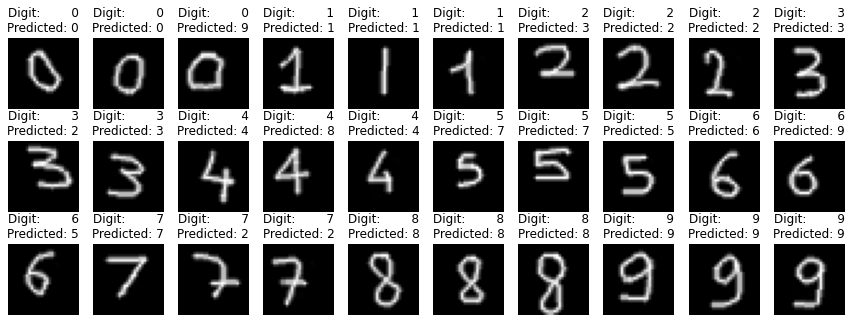

20 esatti su 30
66.66666666666666 %


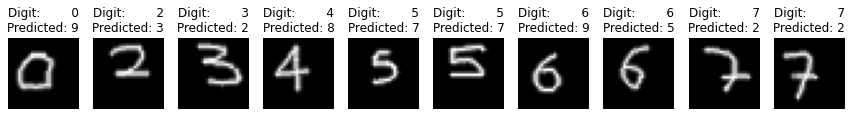

In [19]:

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

predictions = model_CNN_fast.predict(data_array)
data_array = data_array.reshape(data_array.shape[0], img_rows, img_cols,1)
sum = 0
plt.figure(figsize=(15, 30)) 
for i in range(subtotal):    
    ax = plt.subplot(16, 10, i + 1)    
    plt.imshow(data_array[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(data_correct[i], np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()
for i in range(subtotal):
    if data_correct[i] == np.argmax(predictions[i]):
        sum += 1
print(sum, 'esatti su', subtotal)
print(sum/float(subtotal)*100.0, '%')
plt.figure(figsize=(15, 30)) 
counter = 0
for i in range(subtotal):      
    if data_correct[i] != np.argmax(predictions[i]):
        ax = plt.subplot(16, 10, counter + 1)  
        plt.imshow(data_array[i, :, :, 0], cmap='gray')  
        plt.title("Digit:        {}\nPredicted: {}".format(data_correct[i], np.argmax(predictions[i])))    
        plt.axis('off')
        counter += 1
plt.show()

Less than 70%.

Finally I want to try with a set of images more difficult to recognize (digits far away from the center of the image or rotated).

In [20]:
subtotal = 0
data_array = []
data_correct = []
for i in range(10):
    for j in range(3,4):
        pic_num = int(subprocess.check_output(["/bin/sh", "-c", "ls ./Pictures/ | grep ^"+str(i)+"_"+str(j)+".png | wc -l"]).decode('utf-8'))
        
        subtotal += pic_num
        if pic_num != 0:
            digit_filename = "./Pictures/"+str(i)+"_"+str(j)+".png"
            digit_in = Image.open(digit_filename).convert('L')

            ydim, xdim = digit_in.size
            pix=digit_in.load();
            data = np.zeros((xdim, ydim))
            for kk in range(ydim):
                for k in range(xdim):
                    data[k,kk]=pix[kk,k]

            data /= 255
            data_array.append(data)
            data_correct.append(i)
    
data_array = np.array(data_array)
data_array = data_array.reshape(data_array.shape[0], img_rows, img_cols, 1)

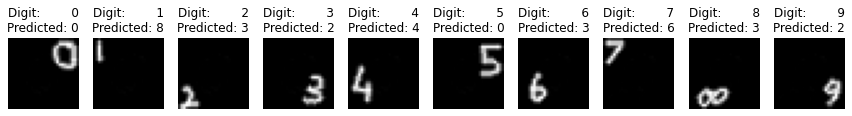

2 esatti su 10
20.0 %


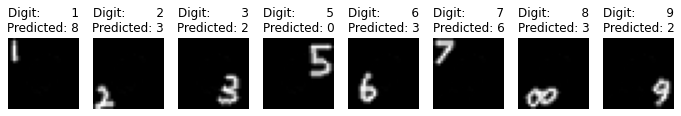

In [21]:
predictions = model_CNN.predict(data_array)
data_array = data_array.reshape(data_array.shape[0], img_rows, img_cols,1)
sum = 0
plt.figure(figsize=(15, 30)) 
for i in range(subtotal):    
    ax = plt.subplot(16, 10, i + 1)    
    plt.imshow(data_array[i, :, :, 0], cmap='gray')    
    plt.title("Digit:        {}\nPredicted: {}".format(data_correct[i], np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()
for i in range(subtotal):
    if data_correct[i] == np.argmax(predictions[i]):
        sum += 1
print(sum, 'esatti su', subtotal)
print(sum/float(subtotal)*100.0, '%')
plt.figure(figsize=(15, 30)) 
counter = 0
for i in range(subtotal):      
    if data_correct[i] != np.argmax(predictions[i]):
        ax = plt.subplot(16, 10, counter + 1)  
        plt.imshow(data_array[i, :, :, 0], cmap='gray')  
        plt.title("Digit:        {}\nPredicted: {}".format(data_correct[i], np.argmax(predictions[i])))    
        plt.axis('off')
        counter += 1
plt.show()

The NN is still able to predict the digit if it's big enough. While this is true for "4" the NN did'n predict the "5" (and the same happened before with more standard digits). This problem may be limit of this NN that should be addressed.